In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pyarrow.parquet as pq
from numpy.linalg import norm
import random
from sklearn.svm import SVR

In [88]:
train_df = pd.read_parquet("C:/Users/jdegu/Documents/cours/M2_IA/apprentissage_supervise/Data_challenge/NYC_taxis_tips/" \
                        +"train.parquet")
# On retire les individus qui n'ont pas donné de tip
train_df_non_zero = train_df[train_df["tip_amount"]>0]
train_df_genereux = train_df[train_df["tip_amount"]>20]
test_df = pd.read_parquet("C:/Users/jdegu/Documents/cours/M2_IA/apprentissage_supervise/Data_challenge/NYC_taxis_tips/" \
                        +"test.parquet")
naive_sub = pd.read_parquet("C:/Users/jdegu/Documents/cours/M2_IA/apprentissage_supervise/Data_challenge/NYC_taxis_tips/" \
                        +"naive_submission.parquet")

In [89]:
X_train = train_df.drop(columns= ['tip_amount','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']) 
Y_train = train_df['tip_amount']


X_train_non_zero = train_df_non_zero.drop(columns= ['tip_amount','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']) 
Y_train_non_zero = train_df_non_zero['tip_amount']

X_train_genereux = train_df_genereux.drop(columns= ['tip_amount','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']) 
Y_train_genereux = train_df_genereux['tip_amount']

X_test = test_df.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'])


In [90]:
print("nombre d'individus : " + str(len(X_train)))
print("nombre d'individus non zero : " + str(len(X_train_non_zero)))
print("nombre d'individus genereux : " + str(len(X_train_genereux)))

nombre d'individus : 100000
nombre d'individus non zero : 79601
nombre d'individus genereux : 505


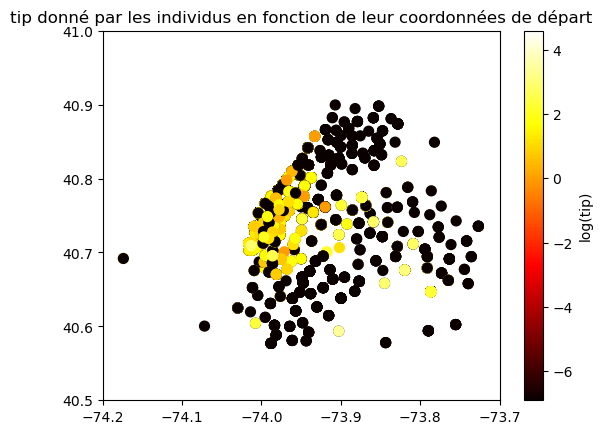

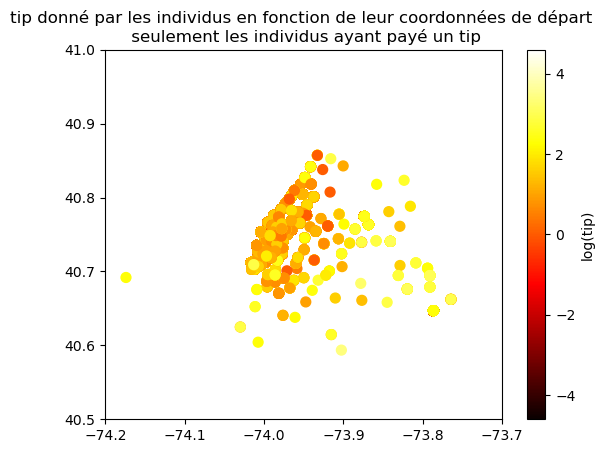

In [104]:
scatter = plt.scatter(X_train['PU_location_lon'], X_train['PU_location_lat'], c=np.log(Y_train+0.001), cmap='hot', s=50)
cbar = plt.colorbar(scatter, label='log(tip)')
plt.xlim([-74.2,-73.7])
plt.ylim([40.5,41.])
plt.title("tip donné par les individus en fonction de leur coordonnées de départ")
plt.show()

scatter = plt.scatter(X_train_non_zero['PU_location_lon'], X_train_non_zero['PU_location_lat'], c=np.log(Y_train_non_zero), cmap='hot', s=50)
cbar = plt.colorbar(scatter, label='log(tip)')
plt.xlim([-74.2,-73.7])
plt.ylim([40.5,41.])
plt.title("tip donné par les individus en fonction de leur coordonnées de départ \n seulement les individus ayant payé un tip")
plt.show()

# scatter = plt.scatter(X_train_genereux['PU_location_lon'], X_train_genereux['PU_location_lat'], c=np.log(Y_train_genereux), cmap='hot', s=50)
# cbar = plt.colorbar(scatter, label='log(tip)')
# plt.xlim([-74.2,-73.7])
# plt.ylim([40.5,41.])
# plt.show()

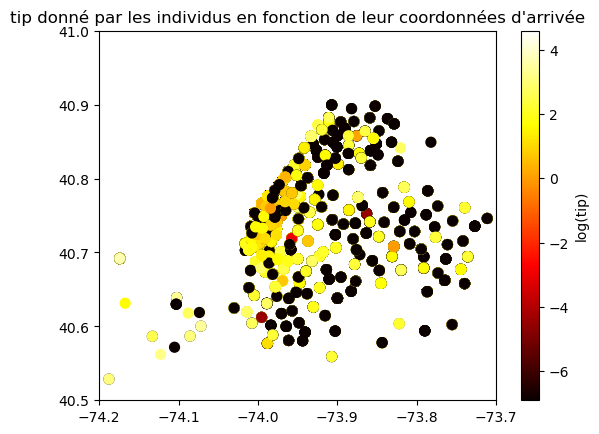

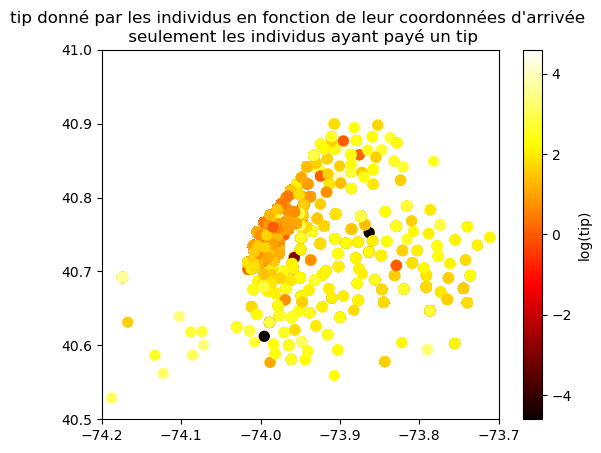

In [105]:
scatter = plt.scatter(X_train['DO_location_lon'], X_train['DO_location_lat'], c=np.log(Y_train+0.001), cmap='hot', s=50)
cbar = plt.colorbar(scatter, label='log(tip)')
plt.xlim([-74.2,-73.7])
plt.ylim([40.5,41.])
plt.title("tip donné par les individus en fonction de leur coordonnées d'arrivée")
plt.show()

scatter = plt.scatter(X_train_non_zero['DO_location_lon'], X_train_non_zero['DO_location_lat'], c=np.log(Y_train_non_zero), cmap='hot', s=50)
cbar = plt.colorbar(scatter, label='log(tip)')
plt.xlim([-74.2,-73.7])
plt.ylim([40.5,41.])
plt.title("tip donné par les individus en fonction de leur coordonnées d'arrivée \n seulement les individus ayant payé un tip")
plt.show()

# scatter = plt.scatter(X_train_genereux['DO_location_lon'], X_train_genereux['DO_location_lat'], c=np.log(Y_train_genereux), cmap='hot', s=50)
# cbar = plt.colorbar(scatter, label='log(tip)')
# plt.xlim([-74.2,-73.7])
# plt.ylim([40.5,41.])
# plt.show()